<a href="https://colab.research.google.com/github/sbashkueva/EDA_mobile_apps/blob/main/Google_Play_apps_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Importing data

In [ ]:
path = 'gdrive/My Drive/Colab Notebooks/'
apps = pd.read_csv(path + 'googleplaystore.csv')
reviews = pd.read_csv(path + 'googleplaystore_user_reviews.csv')

In [ ]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# 2. Exploring dataset and data preprocessing
First, we explore the data with pandas and numpy libraries. We will use the info() method to achieve this. 

Apps dataframe has 10,841 observations with 13 different features. Reviews dataframe includes 64,295 reviews and 5 columns. 

Some of the observations in both df have missing values.

If we look at the random five rows, we can observe that it’s necessary to take several steps to preprocess the data in apps:

1.	Delete duplicates with drop_duplicates() method
2.	Rename columns to lower case to comply with name convention for further SQL analysis
3.	Delete special characters from columns Size, Installs, Price, Reviews like ‘+’, ‘,’, ‘$’, ‘M’ to allow further data type conversion
4.	Covert app sizes to MB
5.	Replace entries errors or uninformative strings in Size, Installs, Price columns with np.NaN to allow further data type conversion
6.	Change the data type for Size, Installs, Price, Reviews to float or integer in order to allow numerical calculations with this data
7.	Delete outliers

For reviews dataframe the following steps are required while preprocessing:
1. Delete duplicates with drop_duplicates() method
2.	Rename columns: Translated_Review column for a shorter name, other columns to lower case to comply with name convention for further SQL analysis
3.	Delete rows with missing values in Sentiment and Review columns using dropna() method, as we need this data for further analysis


In [ ]:
pd.set_option('display.max_columns',13)
print('\n Apps info:\n')
print(apps.info())
print('\n Apps 5 random observations: \n', apps.sample(5))
print('\n Reviews info:\n')
print(reviews.info())
print('\n Apps 5 random reviews: \n', reviews.head(5))


 Apps info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

 Apps 5 random observations: 
                                     App             Category  Rating  Reviews  \
5191  Extreme- Personal Voice A

In [ ]:
# Preprocessing
# 1. Deleting duplicates
apps = apps.drop_duplicates(subset=['App', 'Rating', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'])
print('\n Total number of apps in the dataset after deleting duplicates = ', 
      len(apps))
reviews = reviews.drop_duplicates()
print('\n Total number of reviews in the dataset after deleting duplicates = ', 
      len(reviews))


 Total number of apps in the dataset after deleting duplicates =  9708

 Total number of reviews in the dataset after deleting duplicates =  30679


In [ ]:
# 2. Renaming columns
reviews.rename(columns = {'Translated_Review':'review'}, inplace = True)
# renamig columns to lower case for naming convention for further sql analysis
apps.columns = apps.columns.str.lower() 
reviews.columns = reviews.columns.str.lower()

<ipython-input-11-a0d90f3018b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.rename(columns = {'Translated_Review':'review'}, inplace = True)


In [ ]:
# 3. Deleting missing values
reviews = reviews.dropna(subset = ['sentiment', 'review'])

In [ ]:
# 4. Deleting special characters and entries errors
cols_to_clean = ['installs', 'price', 'reviews', 'size']
chars_to_remove = ['+', ',', '$']

for col in cols_to_clean:
    for char in  chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

apps['size'] = apps['size'].replace('Varies with device', np.NaN)
apps['installs'] = apps['installs'].replace('Free', np.NaN)
apps['price'] = apps['price'].replace('Everyone', np.NaN)

apps['reviews'] = apps['reviews'].apply(lambda x: float(str(x).replace('M', '')) \
                                        * 1000000 if 'M' in str(x) else x)

In [ ]:
# 5. Conversion all Size data to MB
apps['size'] = apps['size'].apply(lambda x: str(x).replace('M', '') \
                                  if 'M' in str(x) else x)
apps['size'] = apps['size'].apply(lambda x: str(x).replace(',', '') \
                                  if 'M' in str(x) else x)
apps['size'] = apps['size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 \
                                  if 'k' in str(x) else x)

In [ ]:
# 6. Conversion to appropriate data type
apps['size'] = apps['size'].astype(float)
apps['installs'] = apps['installs'].astype(float)
apps['price'] = apps['price'].astype(float)
apps['reviews'] = apps['reviews'].astype(int)

As the data types conversion is completed, we can look at the data statistics with describe() method. We observe that there are apps with prices up to $400, rating more than 5.0 which seems unrealistic. When we investigate these applications, it becomes clear that they are sort of junk apps or there are entry mistakes in case of the rating or some too expensive apps with zero installs. These observations are outliers and should be removed from the dataset. 

In [ ]:
# 7. Deleting outliers
print('\n Apps description: \n', apps.describe())
# Apps with price greater than 100
print('\n Apps price outliers: \n', apps[apps['price']>100]\
      [['app', 'installs','price', 'rating']])
# Apps with rating greater than 5.0
print('\n Apps rating outliers: \n', apps[apps['rating']>5]\
      [['app', 'installs','price', 'rating']])
# Removing found outliers
apps = apps[~(apps['price']>100) & ~(apps['rating']>5)]


 Apps description: 
             rating       reviews         size      installs        price  \
count  8228.000000  9.687000e+03  8442.000000  9.687000e+03  9687.000000   
mean      4.174672  2.242288e+05    20.424321  8.180461e+06     0.360102   
std       0.535707  1.843580e+06    21.825315  5.605147e+07     2.376864   
min       1.000000  0.000000e+00     0.008500  0.000000e+00     0.000000   
25%       4.000000  2.500000e+01     4.600000  1.000000e+03     0.000000   
50%       4.300000  1.007000e+03    12.000000  1.000000e+05     0.000000   
75%       4.500000  2.999600e+04    28.000000  1.000000e+06     0.000000   
max       5.000000  7.815831e+07   100.000000  1.000000e+09    89.990000   

       installs_log  reviews_log  
count   9687.000000  9687.000000  
mean           -inf         -inf  
std             NaN          NaN  
min            -inf         -inf  
25%        6.907755     3.218876  
50%       11.512925     6.914731  
75%       13.815511    10.308819  
max       20.

In [ ]:
# 8. Checking stats after preprocessing
print('\n Apps description after cleaning: \n',apps.describe())
print('\n Apps info after cleaning: \n')
print(apps.info())
print('\n Apps 5 random observations after cleaning: \n', apps.sample(5))
print('\n Reviews info after preprocessing: \n')
print(reviews.info())


 Apps description after cleaning: 
             rating       reviews         size      installs        price
count  8228.000000  9.687000e+03  8442.000000  9.687000e+03  9687.000000
mean      4.174672  2.242288e+05    20.424321  8.180461e+06     0.360102
std       0.535707  1.843580e+06    21.825315  5.605147e+07     2.376864
min       1.000000  0.000000e+00     0.008500  0.000000e+00     0.000000
25%       4.000000  2.500000e+01     4.600000  1.000000e+03     0.000000
50%       4.300000  1.007000e+03    12.000000  1.000000e+05     0.000000
75%       4.500000  2.999600e+04    28.000000  1.000000e+06     0.000000
max       5.000000  7.815831e+07   100.000000  1.000000e+09    89.990000

 Apps info after cleaning: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9687 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9687 non-null   object 
 1   category        9687 non-nul

# 3. Connection to Database and Analysis in SQL
For further analysis we need to import the data to database SQLite. We use library sqlite3 in Python firstly to establish the connection with created database and then to import preprocessed data to it.

In [ ]:
# Connection to database
path_to_data = 'C:\\Users\\sayan\\DS_education\\MathsHub\\SQL\\SQL Project\\google_play_apps'
con = sqlite3.connect(path_to_data, 
                      timeout=10)
cur = con.cursor()

In [ ]:
# Importing data to database
apps.to_sql(con=con, name='apps')
reviews.to_sql(con=con, name='reviews')

# 4. Data visualization

4.1. Pairplot to inspect potential correlations and variables distributions.

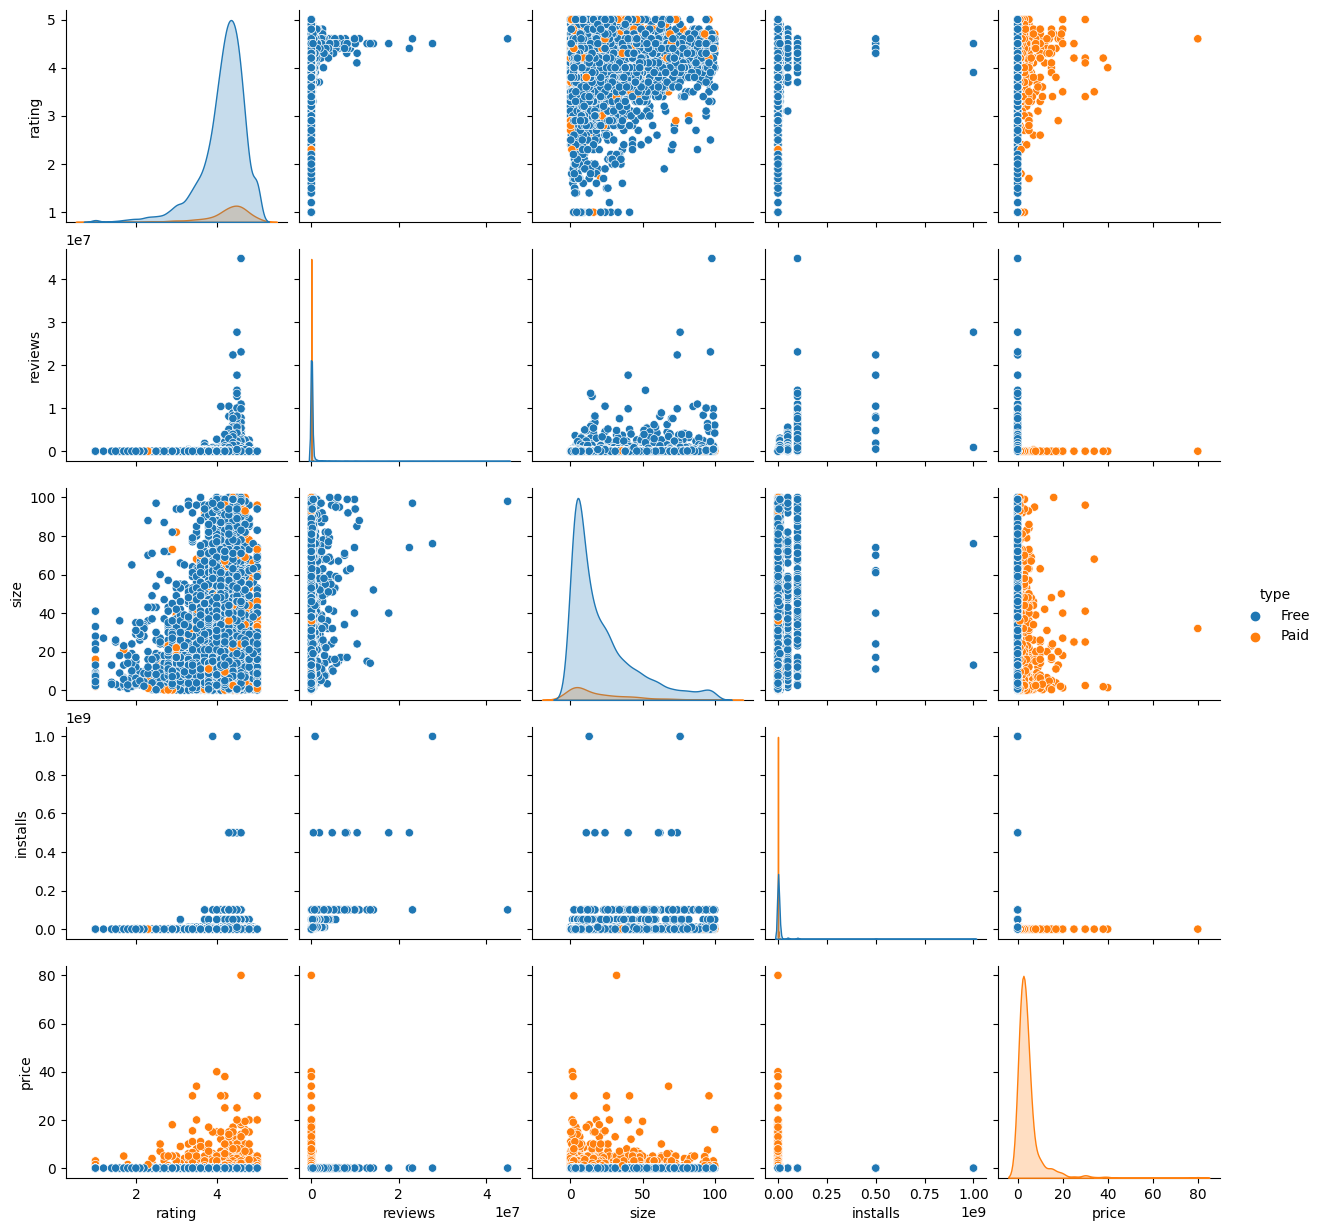

In [ ]:
apps_pairplot = apps.dropna(subset = ['size', 'rating'])
ax = sns.pairplot(apps_pairplot, hue='type')
plt.show()

4.2. Strip plot for exploring number of installs across popular categories

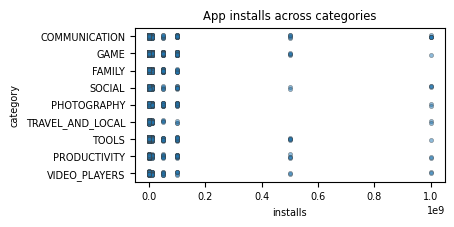

In [ ]:
plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(4,2))

category_popular = ['GAME', 'COMMUNICATION', 'SOCIAL', \
                    'PRODUCTIVITY', 'TOOLS', 'FAMILY', \
                    'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', \
                    'VIDEO_PLAYERS', 'NEWS_AND_MAGAZONES']
apps_cat =  apps[apps['category'].isin(category_popular)]
ax = sns.stripplot(x = 'installs', 
                   y = 'category', 
                   data = apps_cat, 
                   jitter = True, s = 3,
                   linewidth = 0.5, alpha = 0.5)
ax.set_title('App installs across categories')
plt.show()

4.3. Pie chart for app categories

We see the prevalence of several categories on Google Play. Top 3 categories (Family, Game, Tools) represent more than 37% of the market and top 6 app categories represent ~50% percent of the total Google Play app market.

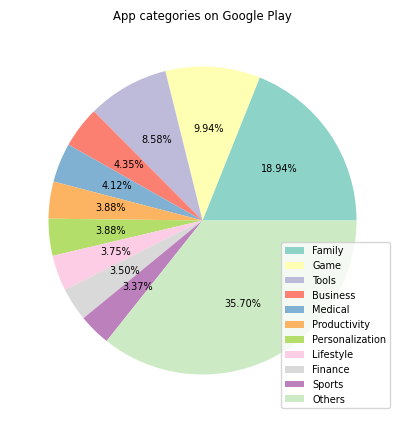

In [ ]:
apps_cat = apps['category'].value_counts().sort_values(ascending = False).reset_index()
apps_cat.rename(columns={'index': 'category', 'category': 'count'}, 
                inplace=True)
apps_cat_others = apps_cat[:10]
others = pd.DataFrame(data = {'category' : ['OTHERS'],'count' : \
                              [apps_cat['count'][10:].sum()]})
apps_cat_others = pd.concat([apps_cat_others, others])

plt.figure(figsize=(5,5))
colors=sns.color_palette('Set3')
plt.pie(apps_cat_others['count'], 
        colors=colors, autopct='%1.2f%%')
plt.legend(apps_cat_others['category'].str.capitalize(), 
           loc="lower right")
plt.title('App categories on Google Play')

plt.show()

4.4. Pie chart for categorical variable 'type' for plotting percentages of free and paid apps

More than 92% of apps in the sample are free.

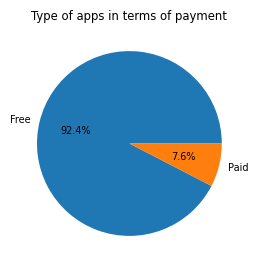

In [ ]:
plt.figure(figsize=(3,3))
apps.groupby('type').size().plot(kind = 'pie', 
                                 autopct = '%1.1f%%')
plt.title('Type of apps in terms of payment')

plt.show()

4.5. Boxplots for exploring prices across all categories for paid apps

On the boxplots below we see that Business, Finance and Medical paid apps have higher prices. The distribution for Finance apps prices has wider range with the max price up to over $30.

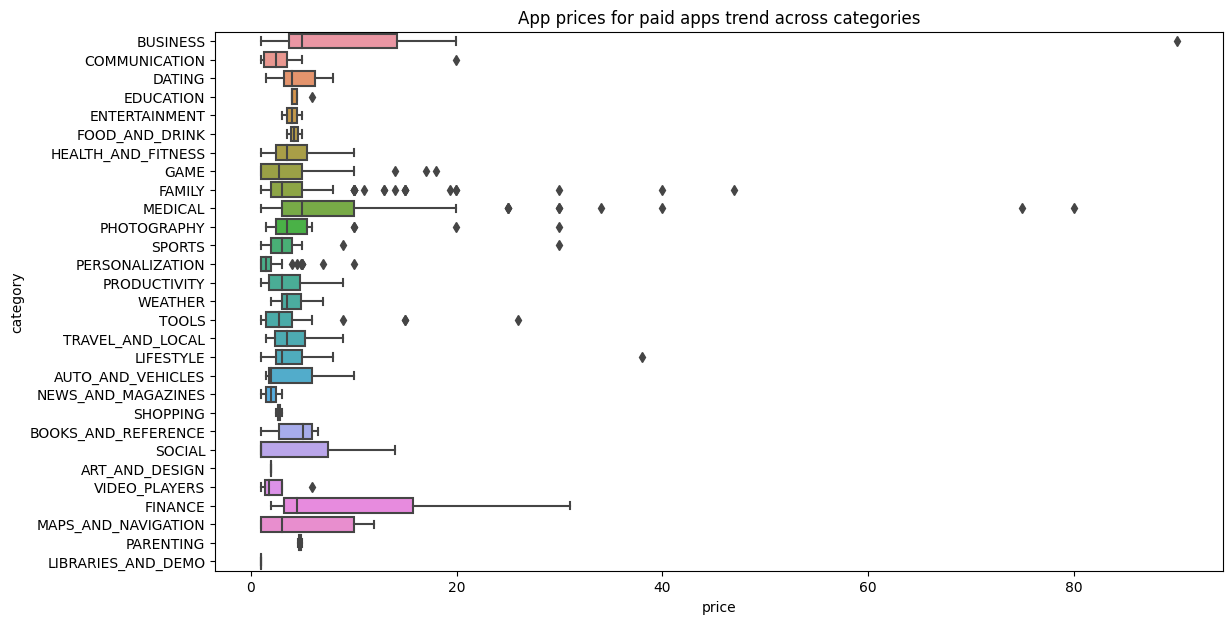

In [ ]:
apps_paid = apps[apps['type']=='Paid']

plt.figure(figsize=(13,7))
ax = sns.boxplot(x = 'price', 
                 y = 'category', 
                 data = apps_paid)
ax.set_title('App prices for paid apps trend across categories')

plt.show()

4.6. Scatter plots for reviews and installs

For analyzing connection between reviews and installs we used logarithmic scale for both variables to standardize values of high variance. We see positive correlation between two variables. Interesting finding is that paid apps tend to get more reviews than free apps having the same number of installs.

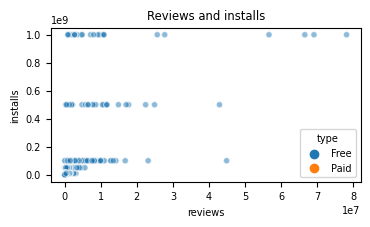

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


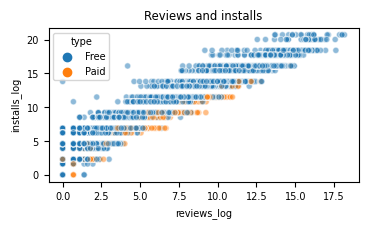

In [ ]:
plt.figure(figsize=(4,2))
ax = sns.scatterplot(x = 'reviews', 
                     y = 'installs', 
                     data = apps, 
                     linewidth = 0.8, s = 20,
                     alpha = 0.5, hue = 'type')
ax.set_title('Reviews and installs')

plt.show()

plt.figure(figsize=(4,2))
apps['installs_log'] = np.log(apps['installs'])
apps['reviews_log'] = np.log(apps['reviews'])
ax = sns.scatterplot(x = 'reviews_log', 
                     y = 'installs_log', 
                     data = apps, 
                     linewidth = 0.8, s = 20,
                     alpha = 0.5, hue = 'type')
ax.set_title('Reviews and installs')

plt.show()

4.7. Scatter plot for size and installs

There is no observed correlation between the app size and number of installs. 

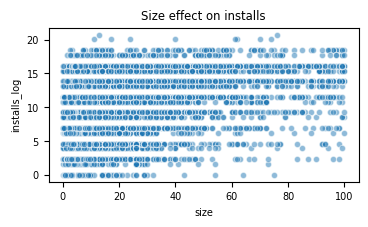

In [ ]:
plt.figure(figsize=(4,2))
ax = sns.scatterplot(x = 'size', 
                     y = 'installs_log', 
                     data = apps, s = 20, 
                     linewidth = 0.8, alpha = 0.5)
ax.set_title('Size effect on installs')

plt.show()

4.8. Scatter plot for number of reviews and rating

Very low ratings are given to apps with relatively lower number of reviews.

<ipython-input-53-6ae9e62ca92b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_reviews['reviews_log'] = np.log(apps_reviews['reviews'])


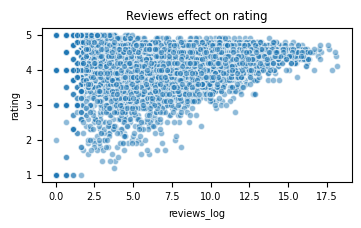

In [ ]:
apps_reviews = apps[apps['reviews']!=0]
apps_reviews['reviews_log'] = np.log(apps_reviews['reviews'])

plt.figure(figsize=(4,2))
ax = sns.scatterplot(x = 'reviews_log', 
                     y = 'rating', 
                     data = apps_reviews, s = 20,
                     linewidth = 0.8, alpha = 0.5)
ax.set_title('Reviews effect on rating')

plt.show()

4.9. Scatter plor for size and rating

There is no clear connection between app size and rating.

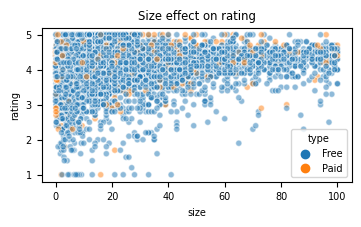

In [ ]:
plt.figure(figsize=(4,2))
ax = sns.scatterplot(x = 'size', 
                     y = 'rating', 
                     data = apps, 
                     linewidth = 0.8, s = 20,
                     alpha = 0.5, hue = 'type')
ax.set_title('Size effect on rating')

plt.show()

4.10. Scatter plot for rating and price for paid apps

There is no clear connection, but very lower ratings on average are given to more expensive apps.

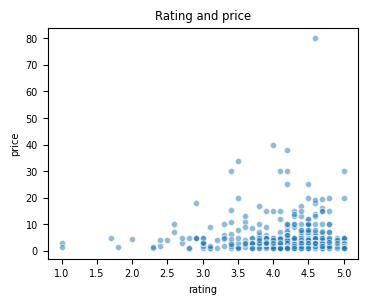

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.scatterplot(x = 'rating', 
                     y = 'price', 
                     data = apps_paid, s = 20,
                     linewidth = 0.8, alpha = 0.5)
ax.set_title('Rating and price')

plt.show()

4.11. Boxplots for number of installs for paid and free apps

Based on the visualization below it’s easier to get more downloads for free apps.

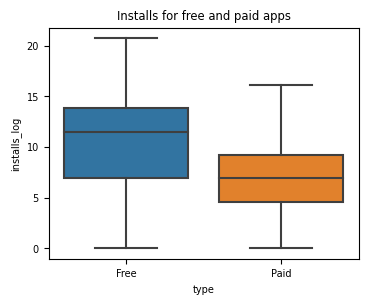

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.boxplot(data = apps, 
                 x = 'type', 
                 y = 'installs_log')
ax.set_title('Installs for free and paid apps')

plt.show()

4.12. Reviews sentiment across app categories

Top three best performing app categories according to reviews are Events, Health and Fitness, Comics with up to 80% of positive reviews. Meanwhile, the worst performing categories are Game, Social and Family with up to more than 1/3 negative reviews.

In [ ]:
# Merging two dataframes
reviews_apps = reviews.merge(apps, left_on='app', 
              right_on='app',
              how='left')
# Calculating number of reviews by sentiment for each category
reviews_apps_hist = reviews_apps.groupby(['category', 'sentiment']).size() \
                                .reset_index(name='count')

fig = px.histogram(reviews_apps_hist, x = 'category',
                   y = 'count', color = 'sentiment',
                   barnorm = 'percent',
                   title = 'Sentiment analysis across categories',
                   color_discrete_map = {'Positive':'rgb(49,189,120)',\
                                         'Neutral':'rgb(49,130,189)',\
                                         'Negative':'rgb(209,49,20)'}
                   ).update_layout(yaxis_title = 'Share of reviews')

fig.show()

4.13. Boxplots for sentiment analysis for free and paid apps

Free apps have wider range of reviews sentiment polarity, especially for negative reviews. This can be explained by lower quality of some free apps.

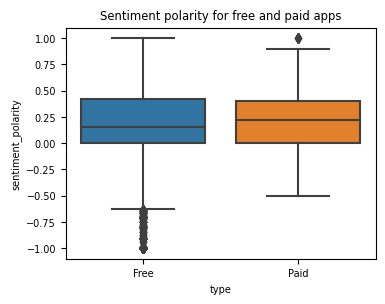

In [ ]:
plt.figure(figsize=(4,3))
ax = sns.boxplot(data = reviews_apps, 
                 x = 'type', 
                 y = 'sentiment_polarity')
ax.set_title('Sentiment polarity for free and paid apps')

plt.show()

# Conclusion

**1.	What kind of apps categories are the most popular in the market?**

While Family, Game, Tools apps are represented more broadly on Google Play, Game, Communication and Tools apps get the greatest number of installs.

**2.	For what kind of apps users tend to pay more across categories?**

The average price for an app is $4.74. The highest average prices among paid apps are in Business, Finance and Medical categories.

**3.	Do more expensive apps tend to receive higher rating?**

If users are not satisfied with the app quality and the price was relatively higher, they are more likely to rank the app poorly on Google Market.

**4. Does the number of reviews affect the number of installs and its ratings?**

The higher number of installs is associated with the higher number of reviews. This could mean either highly reviewed apps tend to be installed more often or just the more installs the app has, the more probable for it to get more reviews. It is possible that this effect works both ways at the same time.

There is no simple connection between number of installs and average rating, but it is suggested that having lower rating it is less probable to get millions of downloads.


**5.	What kind of apps receive more positive and negative reviews?**

Top three best performing app categories according to reviews are Events, Health and Fitness, Comics with up to 80% of positive reviews. The worst performing categories are Game, Social and Family with up to more than 1/3 negative reviews.

Paid apps are rated higher by users on average. Free apps are more likely to get strong negative reviews which can be explained by the quality of some free apps.